In [10]:
#importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#cargamos csv calidad de aire
df_calidad_aire = pd.read_csv('Datasets_limpios\Calidad_del_aire.csv')
df_NYCclima = pd.read_csv('Datasets_limpios/NYCclima.csv')
df_taxis_rutas = pd.read_csv('Datasets_limpios/taxis_rutas.csv')

In [12]:
df_calidad_aire.head()

,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
0,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01,34.64
1,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01,33.22
2,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01,31.25
3,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01,31.15
4,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01,5.89


In [13]:
df_calidad_aire.shape

(16122, 9)

In [5]:
df_calidad_aire.duplicated().sum()

0

In [7]:
df_calidad_aire.isnull().sum()

Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
dtype: int64

In [6]:
df_calidad_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            16122 non-null  object 
 1   Measure         16122 non-null  object 
 2   Measure Info    16122 non-null  object 
 3   Geo Type Name   16122 non-null  object 
 4   Geo Join ID     16122 non-null  int64  
 5   Geo Place Name  16122 non-null  object 
 6   Time Period     16122 non-null  object 
 7   Start_Date      16122 non-null  object 
 8   Data Value      16122 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [7]:
#proporciona una descripción rápida y útil de las estadísticas de la columna "Data Value"
df_calidad_aire['Data Value'].describe()

count    16122.000000
mean        19.129163
std         21.673789
min          0.000000
25%          8.460000
50%         13.900000
75%         25.470000
max        424.700000
Name: Data Value, dtype: float64

Haciendo una revisión de los valores contenidos en la columna 'Name', decido optar por demostrar los valores: Ozono(O3), Sulfur Dioxide (SO2), Nitrogen Dioxide (NO2) y Fine Particulate Matter (PM2.5).Estos componentes son comúnmente utilizados para evaluar la calidad del aire y sus impactos en la salud y el medio ambiente.

In [8]:
#verificamos los valores unicos en la columna Name
df_calidad_aire['Name'].unique()

array(['Ozone (O3)', 'Sulfur Dioxide (SO2)', 'PM2.5-Attributable Deaths',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Air Toxics Concentrations- Average Benzene Concentrations',
       'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       'PM2.5-Attributable Asthma Emergency Department Visits',
       'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)',
       'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)',
       'Traffic Density- Annual Vehicle Miles Traveled',
       'O3-Attributable Cardiac and Respiratory Deaths',
       'O3-Attributable Asthma Emergency Department Visits',
       'O3-Attributable Asthma Hospitalizations',
       'Traffic Density- Annual Vehicle Miles Traveled for Cars',
       'Traffic Density- Annual Vehicle Miles Traveled for Trucks',
       'Nitrogen Dioxide (NO2)', 'Fine Partic

En el siguiente gráfico, podemos observar la evolución de los valores del componente Ozone (O3) en relación con la contaminación del aire. Se destaca que este componente mantiene valores relativamente constantes a lo largo del tiempo. Por otro lado, al analizar el componente Nitrogen Dioxide, se puede apreciar la presencia de picos en ciertas estaciones del año.

Con respecto al componente 'Fine Particulate Matter (PM2.5)', se nota una leve reducción en sus valores a medida que transcurren los años. Lamentablemente, no podemos realizar observaciones sobre el componente Sulfur Dioxide, ya que no disponemos de valores para los últimos 3 años analizados.

Esta visualización nos brinda una mejor comprensión de cómo estos componentes clave influyen en la calidad del aire y cómo sus patrones de comportamiento varían a lo largo del tiempo.

Se ha realizado un análisis de los datos correspondientes a los últimos tres años disponibles: 2018,2019,2020. El objetivo era comparar la densidad de tráfico entre autos y camiones en el año 2016. Sin embargo, lamentablemente, no se dispone de datos para evaluar esta comparación. A pesar de la falta de datos de tráfico de autos y camiones, se ha realizado un análisis exhaustivo de la calidad del aire y otros aspectos relacionados con la densidad de tráfico en otros contextos.

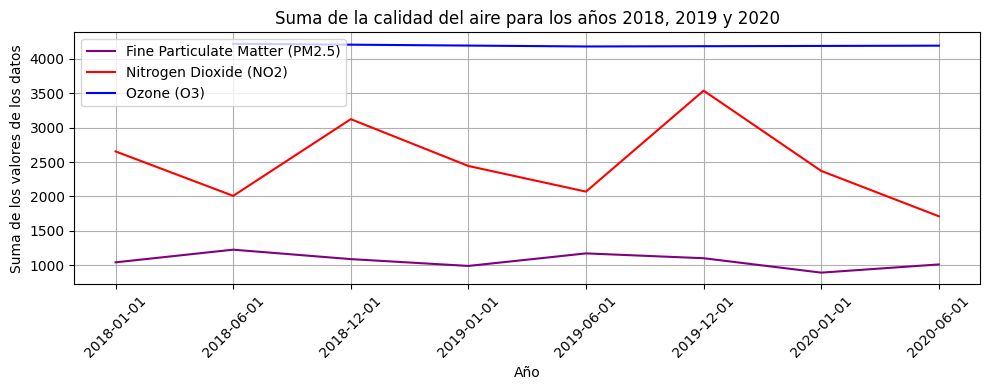

In [9]:
# Filtramos los datos para los años 2018, 2019 y 2020
years = ["2018", "2019", "2020"]
filtered_df = df_calidad_aire[df_calidad_aire["Start_Date"].str[:4].isin(years)]
selected_names = ["Ozone (O3)", "Sulfur Dioxide (SO2)", "Nitrogen Dioxide (NO2)", "Fine Particulate Matter (PM2.5)"]
filtered_df = filtered_df[filtered_df["Name"].isin(selected_names)]

# Agrupamos por año y nombre y sumamos los valores
grouped_df = filtered_df.groupby(["Start_Date", "Name"])["Data Value"].sum().reset_index()

# Creamos una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 4))

# Colores correspondientes a los componentes
component_colors = {
    "Ozone (O3)": "blue",
    "Sulfur Dioxide (SO2)": "green",
    "Nitrogen Dioxide (NO2)": "red",
    "Fine Particulate Matter (PM2.5)": "purple"
}

# Iteramos a través de los nombres y ploteamos los datos sumados correspondientes
for name in grouped_df["Name"].unique():
    df_name = grouped_df[grouped_df["Name"] == name]
    color = component_colors.get(name, "black")  
    ax.plot(df_name["Start_Date"], df_name["Data Value"], label=name, color=color)

# Personalizanos el gráfico
ax.set_title("Suma de la calidad del aire para los años 2018, 2019 y 2020")
ax.set_xlabel("Año")
ax.set_ylabel("Suma de los valores de los datos")
ax.legend()
ax.grid(True)

# Rotamos las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

En relación a las 'Concentraciones Promedio de Benceno' y 'Concentraciones Promedio de Formaldehído', es importante destacar que los últimos datos disponibles corresponden a enero de 2011. Dado que han transcurrido 12 años desde esa fecha y no contamos con datos más actualizados, reconocemos que estos valores podrían no ser representativos de la situación actual.

In [14]:
# Filtrar los registros para los valores 
filtered = df_calidad_aire[(df_calidad_aire['Name'] == 'Air Toxics Concentrations- Average Benzene Concentrations') ]
filtered.tail()

,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
8585,Air Toxics Concentrations- Average Benzene Con...,Annual Average Concentration,µg/m3,UHF42,501,Port Richmond,2011,2011-01-01,1.2
8586,Air Toxics Concentrations- Average Benzene Con...,Annual Average Concentration,µg/m3,UHF42,502,Stapleton - St. George,2011,2011-01-01,1.1
8587,Air Toxics Concentrations- Average Benzene Con...,Annual Average Concentration,µg/m3,UHF42,503,Willowbrook,2011,2011-01-01,1.1
8588,Air Toxics Concentrations- Average Benzene Con...,Annual Average Concentration,µg/m3,UHF42,504,South Beach - Tottenville,2011,2011-01-01,1.0
8589,Air Toxics Concentrations- Average Benzene Con...,Annual Average Concentration,µg/m3,Citywide,1,New York City,2011,2011-01-01,1.6


In [15]:
filtered2= df_calidad_aire[(df_calidad_aire['Name'] == 'Air Toxics Concentrations- Average Formaldehyde Concentrations')]
filtered2.tail()

,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value
8634,Air Toxics Concentrations- Average Formaldehyd...,Annual Average Concentration,µg/m3,UHF42,501,Port Richmond,2011,2011-01-01,1.8
8635,Air Toxics Concentrations- Average Formaldehyd...,Annual Average Concentration,µg/m3,UHF42,502,Stapleton - St. George,2011,2011-01-01,1.7
8636,Air Toxics Concentrations- Average Formaldehyd...,Annual Average Concentration,µg/m3,UHF42,503,Willowbrook,2011,2011-01-01,1.8
8637,Air Toxics Concentrations- Average Formaldehyd...,Annual Average Concentration,µg/m3,UHF42,504,South Beach - Tottenville,2011,2011-01-01,1.7
8638,Air Toxics Concentrations- Average Formaldehyd...,Annual Average Concentration,µg/m3,Citywide,1,New York City,2011,2011-01-01,2.1


Se han analizado dos componentes clave relacionados con el tráfico vehicular: 'Traffic Density- Annual Vehicle Miles Traveled for Cars' (Densidad de Tráfico - Millas Anuales Recorridas por Vehículos de Pasajeros) y 'Traffic Density- Annual Vehicle Miles Traveled for Trucks' (Densidad de Tráfico - Millas Anuales Recorridas por Camiones). Además de visualizar estos componentes, se ha destacado la densidad de tráfico expresada en miles de millones de millas por kilómetro cuadrado en los últimos años analizados. Sin embargo, es importante señalar que los datos disponibles para este análisis se limitan al año 2016. A pesar de la restricción temporal, este análisis proporciona una visión valiosa de la densidad de tráfico y su relación con otros aspectos, como la calidad del aire y el entorno urbano.

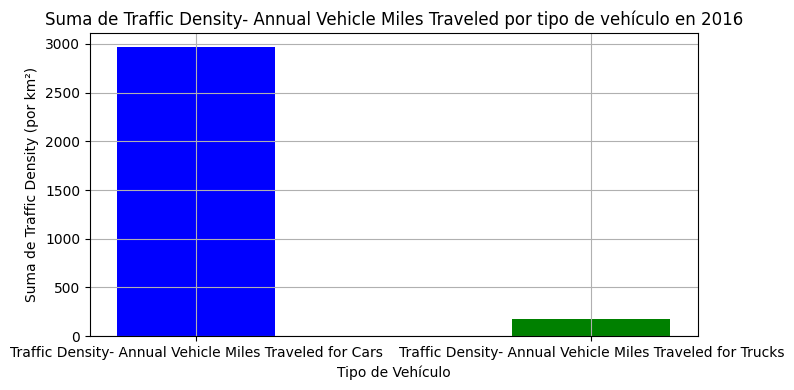

In [10]:

# Filtramos los datos solo para el año 2016
years = ["2016"]
filtered_df = df_calidad_aire[df_calidad_aire["Start_Date"].str[:4].isin(years)]

# Seleccionamos los componentes relacionados con el tráfico vehicular
selected_names = ['Traffic Density- Annual Vehicle Miles Traveled for Cars',
                  'Traffic Density- Annual Vehicle Miles Traveled for Trucks']
filtered_df = filtered_df[filtered_df["Name"].isin(selected_names)]

# Agrupamos por nombre y sumar los valores
grouped_df = filtered_df.groupby(["Name"])["Data Value"].sum().reset_index()

# Creamos una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(8, 4))
width = 0.4

# Creamos el gráfico de barras
ax.bar(grouped_df['Name'], grouped_df['Data Value'], width=width, color=['blue', 'green'])

# Personalizamos el gráfico
ax.set_title("Suma de Traffic Density- Annual Vehicle Miles Traveled por tipo de vehículo en 2016")
ax.set_xlabel("Tipo de Vehículo")
ax.set_ylabel("Suma de Traffic Density (por km²)")
ax.grid(True)

# Mostramos el gráfico
plt.tight_layout()
plt.show()


Es relevante resaltar que la circulación de vehículos de pasajeros es significativamente mayor en comparación con la circulación de camiones. Esta diferencia en la densidad de tráfico entre automóviles y camiones en el análisis refleja una dinámica importante en la movilidad urbana.

In [11]:
df_calidad_aire['Geo Place Name'].unique()

array(['Coney Island (CD13)', 'Bronx', 'Morris Park and Bronxdale (CD11)',
       'Williamsbridge and Baychester (CD12)', 'Brooklyn',
       'Greenpoint and Williamsburg (CD1)',
       'Fort Greene and Brooklyn Heights (CD2)',
       'Bedford Stuyvesant (CD3)', 'Bushwick (CD4)',
       'East New York and Starrett City (CD5)',
       'Park Slope and Carroll Gardens (CD6)', 'Sunset Park (CD7)',
       'Crown Heights and Prospect Heights (CD8)',
       'Belmont and East Tremont (CD6)',
       'Kingsbridge Heights and Bedford (CD7)', 'Kingsbridge - Riverdale',
       'Northeast Bronx', 'Fordham - Bronx Pk', 'Pelham - Throgs Neck',
       'Crotona -Tremont', 'High Bridge - Morrisania',
       'Hunts Point - Mott Haven', 'Greenpoint',
       'Downtown - Heights - Slope', 'Bedford Stuyvesant - Crown Heights',
       'East New York', 'Sunset Park', 'Borough Park',
       'East Flatbush - Flatbush', 'Canarsie - Flatlands',
       'Bensonhurst - Bay Ridge', 'Coney Island - Sheepshead Bay',
     

Visualizamos la contaminación promedio de diferentes lugares específicos en la ciudad de Nueva York durante el año 2020. Este nos proporciona información detallada sobre cómo varía la contaminación en áreas específicas de la ciudad.

In [232]:
df_calidad_aire['Geo Type Name'].unique()

array(['CD', 'Borough', 'UHF42', 'Citywide', 'UHF34'], dtype=object)

Los valores en la columna "Geo Type Name" representan diferentes tipos de áreas geográficas o divisiones administrativas en la ciudad de Nueva York. 

1. 'CD' (Community District): Se refiere a las divisiones administrativas más pequeñas de la ciudad de Nueva York conocidas como "Distritos Comunitarios". Cada distrito comunitario tiene un número y un nombre y se utilizan para organizar y administrar los servicios locales.

2. 'Borough': Hace referencia a los cinco distritos principales de la ciudad de Nueva York: Bronx, Brooklyn, Manhattan, Queens y Staten Island. Cada uno de estos distritos es una entidad administrativa con su propio gobierno local.

3. 'UHF42' (Uniformed Hospital Fund Area 42): Estas áreas se utilizan para la administración de fondos de hospitales. Son subdivisiones más grandes y pueden agrupar varios vecindarios y comunidades.

4. 'Citywide': Indica que los datos son agregados a nivel de toda la ciudad de Nueva York, en lugar de estar desglosados por áreas específicas.

5. 'UHF34' (Uniformed Hospital Fund Area 34): Similar al 'UHF42', se trata de divisiones para la administración de fondos de hospitales, pero en este caso se refiere a una subdivisión diferente.

Estas divisiones geográficas permiten organizar y analizar los datos de diferentes maneras, ya sea a nivel de distritos, vecindarios, hospitales u otros niveles administrativos en la ciudad.

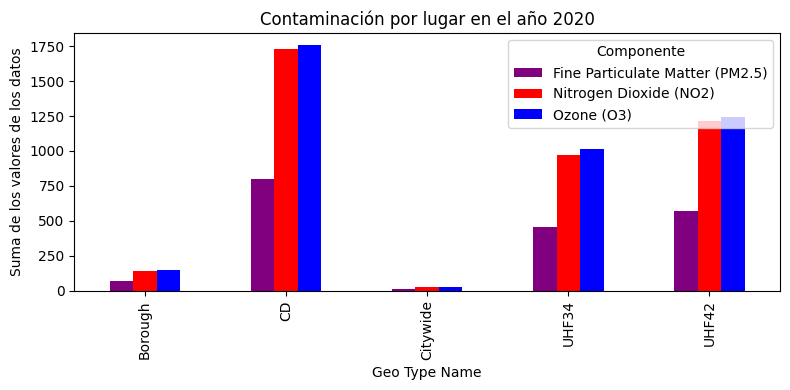

In [28]:
# Filtramos los datos para el año 2020 y los componentes seleccionados
selected_names = ['Ozone (O3)', 'Sulfur Dioxide (SO2)', 'Nitrogen Dioxide (NO2)', 'Fine Particulate Matter (PM2.5)']
filtered_df = df_calidad_aire[(df_calidad_aire["Start_Date"].str[:4] == "2020") & (df_calidad_aire["Name"].isin(selected_names))]

# Obtenemos los valores únicos de la columna "Geo Type Name"
unique_places = filtered_df["Geo Type Name"].unique()


# Colores correspondientes a los componentes
component_colors = {
    "Ozone (O3)": "blue",
    "Sulfur Dioxide (SO2)": "green",
    "Nitrogen Dioxide (NO2)": "red",
    "Fine Particulate Matter (PM2.5)": "purple"
}

# Creamos un gráfico de barras
fig, ax = plt.subplots(figsize=(8, 4))
pivot_table = filtered_df.pivot_table(index="Geo Type Name", columns="Name", values="Data Value", aggfunc="sum")

# Añadimos los colores correspondientes a los componentes
pivot_table.plot(kind="bar", ax=ax, color=[component_colors[col] for col in pivot_table.columns])

# Personalizamos el gráfico
ax.set_title("Contaminación por lugar en el año 2020")
ax.set_xlabel("Geo Type Name")
ax.set_ylabel("Suma de los valores de los datos")
ax.legend(title="Componente")

# Rotamos las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostramos el gráfico
plt.tight_layout()
plt.show()



In [9]:
df_NYCclima.head()


,time,hours,temperature_2m (°C),precipitation (mm),rain (mm),is_day ()
0,2020-01-01,00:00:00,3.0,0.0,0.0,0
1,2020-01-01,01:00:00,2.8,0.0,0.0,0
2,2020-01-01,02:00:00,3.5,0.0,0.0,0
3,2020-01-01,03:00:00,3.6,0.0,0.0,0
4,2020-01-01,04:00:00,3.1,0.0,0.0,0


In [314]:
df_taxis_rutas.head()

,Fecha,Pasajeros por dia,Viajes por dia,Tarifario por dia,Total recaudado por dia,Pago con tarjeta,Pago con efectivo,Tipo de Taxi
0,2022-01-01,1320,1273,20361.61,25128.72,568,508,green
1,2022-01-02,1739,1500,21448.61,26851.77,830,543,green
2,2022-01-03,2716,2332,30798.87,38778.99,1216,917,green
3,2022-01-04,2438,2165,30469.21,38390.10,1190,793,green
4,2022-01-05,2650,2259,30853.43,39222.21,1266,806,green


In [242]:
df_NYCclima.shape

(31680, 6)

In [45]:
df_NYCclima.isnull().sum()

time                    0
hours                   0
temperature_2m (°C)    48
precipitation (mm)     48
rain (mm)              48
is_day ()               0
dtype: int64

In [47]:
df_NYCclima.duplicated().sum()

0

In [48]:
df_taxis_rutas.isnull().sum()

Fecha                      0
Pasajeros por dia          0
Viajes por dia             0
Tarifario por dia          0
Total recaudado por dia    0
Pago con tarjeta           0
Pago con efectivo          0
Tipo de Taxi               0
dtype: int64

In [51]:
df_taxis_rutas.duplicated().sum()


0

In [243]:
df_taxis_rutas.shape

(1136, 8)

In [251]:
df_NYCclima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 31680 non-null  object 
 1   hours                31680 non-null  object 
 2   temperature_2m (°C)  31632 non-null  float64
 3   precipitation (mm)   31632 non-null  float64
 4   rain (mm)            31632 non-null  float64
 5   is_day ()            31680 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ MB


In [250]:
df_taxis_rutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    1136 non-null   object 
 1   Pasajeros por dia        1136 non-null   int64  
 2   Viajes por dia           1136 non-null   int64  
 3   Tarifario por dia        1136 non-null   float64
 4   Total recaudado por dia  1136 non-null   float64
 5   Pago con tarjeta         1136 non-null   int64  
 6   Pago con efectivo        1136 non-null   int64  
 7   Tipo de Taxi             1136 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 71.1+ KB


In [252]:
df_NYCclima.describe()

,temperature_2m (°C),precipitation (mm),rain (mm),is_day ()
count,31632.000000,31632.000000,31632.000000,31680.000000
mean,12.507119,0.131516,0.124678,0.513194
std,9.707706,0.533901,0.525317,0.499834
min,-16.300000,0.000000,0.000000,0.000000
25%,4.600000,0.000000,0.000000,0.000000
50%,12.400000,0.000000,0.000000,1.000000
75%,20.800000,0.000000,0.000000,1.000000
max,36.000000,11.300000,11.300000,1.000000


In [253]:
df_taxis_rutas.describe()

,Pasajeros por dia,Viajes por dia,Tarifario por dia,Total recaudado por dia,Pago con tarjeta,Pago con efectivo
count,1136.000000,1136.000000,1.136000e+03,1.136000e+03,1136.000000,1136.000000
mean,63169.305458,47041.461268,5.861138e+05,1.083169e+06,2054.625880,35580.809859
std,72327.252866,53685.649331,5.309949e+06,1.254270e+06,1483.372668,41585.925566
min,1.000000,1.000000,-1.758926e+08,5.800000e+00,0.000000,0.000000
25%,2388.250000,2101.000000,3.232447e+04,4.105498e+04,1194.750000,651.750000
50%,3063.000000,2610.500000,4.101050e+04,5.274190e+04,1508.000000,848.500000
75%,143730.500000,106126.500000,1.665950e+06,2.428784e+06,3164.500000,81152.250000
max,185314.000000,135547.000000,2.525878e+06,3.708651e+06,7213.000000,104558.000000


Partimos de vizualizar las tarifas del data set df_taxis_rutas, en base a los dos ultimos años analizados.

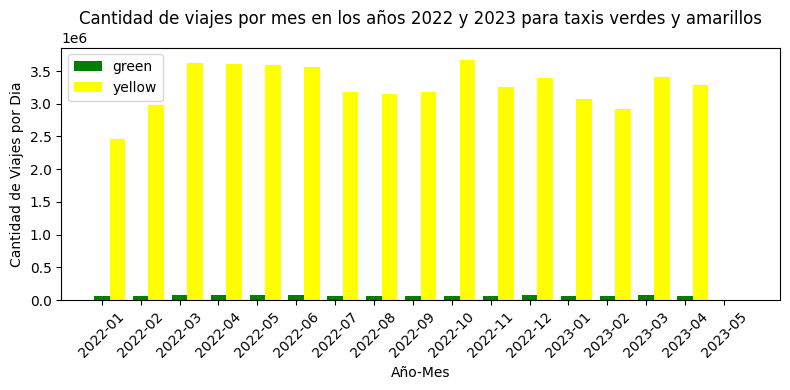

In [299]:
# Convertimos la columna "Fecha" a tipo datetime
df_taxis_rutas["Fecha"] = pd.to_datetime(df_taxis_rutas["Fecha"])

# Filtramos los datos para los años 2022 y 2023
filtered_df = df_taxis_rutas[df_taxis_rutas['Fecha'].dt.year.isin([2022, 2023])]

# Agrupamos por año, mes y tipo de taxi, y sumar los valores numéricos
grouped_df = filtered_df.groupby([filtered_df['Fecha'].dt.year.rename('Año'), filtered_df['Fecha'].dt.month.rename('Mes'), 'Tipo de Taxi']).agg({'Viajes por dia': 'sum'}).reset_index()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 4))
colors = {'green': 'green', 'yellow': 'yellow'}
width = 0.4  # Ancho de las barras

for i, tipo in enumerate(['green', 'yellow']):
    tipo_df = grouped_df[grouped_df['Tipo de Taxi'] == tipo]
    x = tipo_df['Año'].astype(str) + '-' + tipo_df['Mes'].astype(str).str.zfill(2)
    plt.bar([val + i*width for val in range(len(x))], tipo_df['Viajes por dia'], width=width, label=tipo, color=colors[tipo])

plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de Viajes por Dia')
plt.title('Cantidad de viajes por mes en los años 2022 y 2023 para taxis verdes y amarillos')
plt.xticks(range(len(x)), x, rotation=45)
plt.legend()
plt.tight_layout()

# Mostramos el gráfico
plt.show()

En este gráfico, podemos visualizar que durante los meses analizados en los años 2022 y 2023, los autos de combustión son los más utilizados en el transporte. A pesar de ello, se observa una incipiente implementación de los autos verdes. Es relevante destacar que esta transición hacia vehículos más sostenibles es reciente y se refleja en los datos presentados en el gráfico.

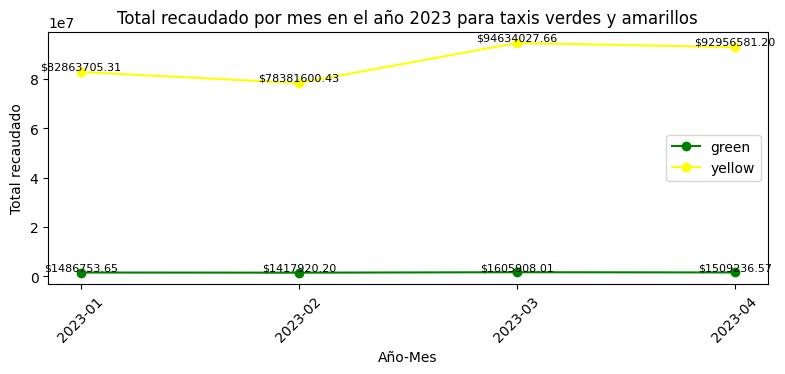

In [313]:
# Convertimos la columna "Fecha" a tipo datetime
df_taxis_rutas["Fecha"] = pd.to_datetime(df_taxis_rutas["Fecha"])

# Filtramos los datos para los años 2022 y 2023
filtered_df = df_taxis_rutas[df_taxis_rutas['Fecha'].dt.year.isin([2023])]

# Excluimos los datos de mayo de 2023 para los autos yellow
filtered_df = filtered_df[~((filtered_df['Fecha'].dt.month == 5) & (filtered_df['Tipo de Taxi'] == 'yellow'))]

# Agrupamos por año, mes y tipo de taxi, y sumar los valores numéricos
grouped_df = filtered_df.groupby([filtered_df['Fecha'].dt.year.rename('Año'), filtered_df['Fecha'].dt.month.rename('Mes'), 'Tipo de Taxi']).agg({'Total recaudado por dia': 'sum'}).reset_index()

# Creamos el gráfico de líneas
plt.figure(figsize=(8, 4))
colors = {'green': 'green', 'yellow': 'yellow'}

for tipo in ['green', 'yellow']:
    tipo_df = grouped_df[grouped_df['Tipo de Taxi'] == tipo]
    x = tipo_df['Año'].astype(str) + '-' + tipo_df['Mes'].astype(str).str.zfill(2)
    plt.plot(x, tipo_df['Total recaudado por dia'], label=tipo, color=colors[tipo], marker='o')
    
    # Agregamos etiquetas de valor en cada punto para cada mes
    for i, (year, month, value) in tipo_df[['Año', 'Mes', 'Total recaudado por dia']].iterrows():
        plt.text(x[i], value, f'${value:.2f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Año-Mes')
plt.ylabel('Total recaudado')
plt.title('Total recaudado por mes en el año 2023 para taxis verdes y amarillos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Aquí podemos visualizar la recaudación de los autos a combustión en comparación con los autos eléctricos. Cabe destacar que se excluye el último mes analizado (05/2023) para los autos a combustión debido a la falta de datos disponibles para ese período. 

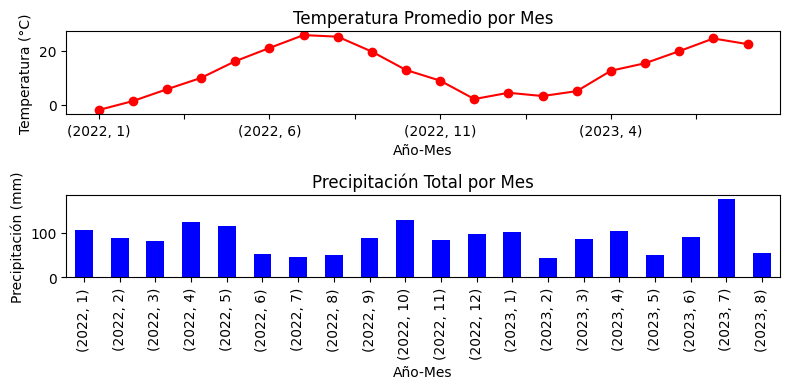

In [325]:
# Convertimos la columna "time" a tipo datetime
df_NYCclima['time'] = pd.to_datetime(df_NYCclima['time'])

# Filtramos los datos para los años 2022 y 2023
filtered_df = df_NYCclima[df_NYCclima['time'].dt.year.isin([2022, 2023])]

# Creamos subplots con dos gráficos (temperatura y precipitación)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))

# Gráfico Temperatura por mes
temperatura_por_mes = filtered_df.groupby([filtered_df['time'].dt.year.rename('Año'), filtered_df['time'].dt.month.rename('Mes')])['temperature_2m (°C)'].mean()
temperatura_por_mes.plot(kind='line', ax=axes[0], marker='o', color= 'red')
axes[0].set_title('Temperatura Promedio por Mes')
axes[0].set_xlabel('Año-Mes')
axes[0].set_ylabel('Temperatura (°C)')

# Gráfico de Precipitación por mes
precipitacion_por_mes = filtered_df.groupby([filtered_df['time'].dt.year.rename('Año'), filtered_df['time'].dt.month.rename('Mes')])['precipitation (mm)'].sum()
precipitacion_por_mes.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Precipitación Total por Mes')
axes[1].set_xlabel('Año-Mes')
axes[1].set_ylabel('Precipitación (mm)')

plt.tight_layout()
plt.show()

En los gráficos presentados, se establece una relación entre dos conjuntos de datos: los registros de viajes y los datos de precipitaciones. El análisis se centra en los totales de viajes por mes durante los últimos dos años, 2022 y 2023, con el objetivo de examinar la posible correlación entre la cantidad de viajes y las precipitaciones. Esta comparación se lleva a cabo tanto para los taxis amarillos como para los taxis verdes. La intención es determinar si hay un aumento en la cantidad de viajes en relación con los niveles de precipitación, lo que podría arrojar luz sobre la influencia del clima en la demanda de transporte público.

RELACIÓN CANTIDAD VIAJES EN TAXIS VERDES CON PRECIPITACIONES Y TEMPERATURAS.

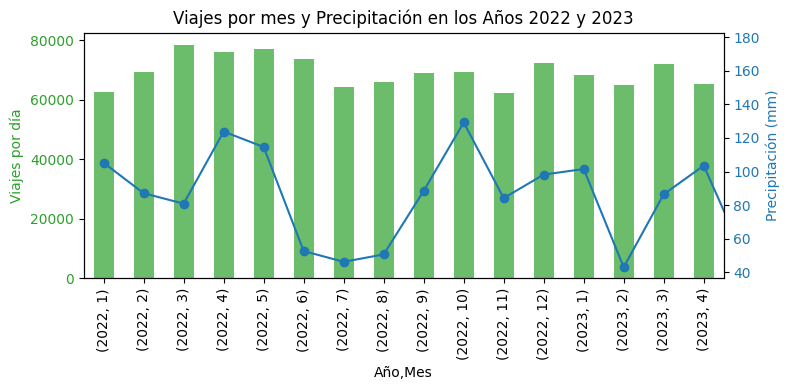

In [368]:
# Convertimos la columna "Fecha" a tipo datetime
df_taxis_rutas['Fecha'] = pd.to_datetime(df_taxis_rutas['Fecha'])
df_NYCclima['time'] = pd.to_datetime(df_NYCclima['time'])

# Filtramos los datos para los años 2022 y 2023
filtered_df_viajes = df_taxis_rutas[df_taxis_rutas['Fecha'].dt.year.isin([2022, 2023]) & (df_taxis_rutas['Tipo de Taxi'] == 'green')]
filtered_df_clima = df_NYCclima[df_NYCclima['time'].dt.year.isin([2022, 2023])]

# Agrupamos los datos por año y mes
viajes_por_mes = filtered_df_viajes.groupby([filtered_df_viajes['Fecha'].dt.year.rename('Año'), filtered_df_viajes['Fecha'].dt.month.rename('Mes')])['Viajes por dia'].sum()
precipitacion_por_mes = filtered_df_clima.groupby([filtered_df_clima['time'].dt.year.rename('Año'), filtered_df_clima['time'].dt.month.rename('Mes')])['precipitation (mm)'].sum()

# Creamos el gráfico combinado
fig, ax1 = plt.subplots(figsize=(8, 4))

# Grafico de barras para viajes por día
color = 'tab:green'
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Viajes por día', color=color)
viajes_por_mes.plot(kind='bar', ax=ax1, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Creamos el segundo eje y para la precipitación
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precipitación (mm)', color=color)
precipitacion_por_mes.plot(kind='line', ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Viajes por mes y Precipitación en los Años 2022 y 2023')
fig.tight_layout()
plt.show()

En el gráfico que examina la relación entre las precipitaciones y el uso de taxis verdes, se observa que no existen aumentos notables en la demanda de estos vehículos durante períodos de precipitaciones elevadas. Esto sugiere que las condiciones climáticas adversas, como la lluvia intensa, no parecen influir significativamente en un aumento en la utilización de taxis verdes como una elección preferida de transporte. Además, este análisis refleja la posibilidad de que otros factores tengan un papel más influyente en la decisión de transporte durante condiciones climáticas desfavorables.

Una consideración importante es la creciente conciencia ambiental entre las personas. Los taxis verdes, que a menudo son vehículos más ecológicos y eficientes en términos de consumo de combustible, han sido promovidos como una opción más sostenible para el transporte urbano. A pesar de que no se observan aumentos significativos en la demanda en relación con las precipitaciones, es posible que la conciencia ambiental influya en la elección de los pasajeros de optar por los taxis verdes como una alternativa más ecológica, independientemente de las condiciones climáticas.

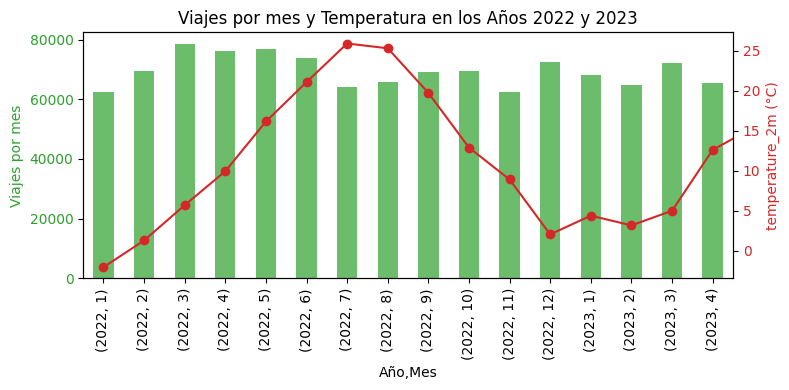

In [56]:
# Convertimos la columna "Fecha" a tipo datetime
df_taxis_rutas['Fecha'] = pd.to_datetime(df_taxis_rutas['Fecha'])
df_NYCclima['time'] = pd.to_datetime(df_NYCclima['time'])

# Filtramos los datos para los años 2022 y 2023
filtered_df_viajes = df_taxis_rutas[df_taxis_rutas['Fecha'].dt.year.isin([2022, 2023]) & (df_taxis_rutas['Tipo de Taxi'] == 'green')]
filtered_df_clima = df_NYCclima[df_NYCclima['time'].dt.year.isin([2022, 2023])]

# Agrupamos los datos por año y mes
viajes_por_mes = filtered_df_viajes.groupby([filtered_df_viajes['Fecha'].dt.year.rename('Año'), filtered_df_viajes['Fecha'].dt.month.rename('Mes')])['Viajes por dia'].sum()
temperatura_por_mes = filtered_df_clima.groupby([filtered_df_clima['time'].dt.year.rename('Año'), filtered_df_clima['time'].dt.month.rename('Mes')])['temperature_2m (°C)'].mean()

# Creamos el gráfico combinado
fig, ax1 = plt.subplots(figsize=(8, 4))

# Gráfico de barras para viajes por día
color = 'tab:green'
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Viajes por mes', color=color)
viajes_por_mes.plot(kind='bar', ax=ax1, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Creamos el segundo eje y para la temperatura
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('temperature_2m (°C)', color=color)
temperatura_por_mes.plot(kind='line', ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Viajes por mes y Temperatura en los Años 2022 y 2023')
fig.tight_layout()
plt.show()


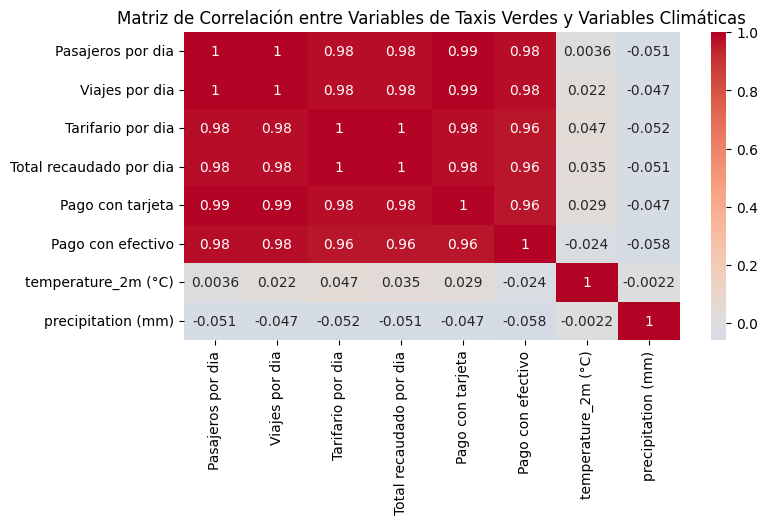

In [363]:
# Convertimos la columna 'Fecha' en formato datetime para ambos data sets
df_taxis_rutas['Fecha'] = pd.to_datetime(df_taxis_rutas['Fecha'])
df_NYCclima['time'] = pd.to_datetime(df_NYCclima['time'])

# Realizamos un filtro para los autos verdes en df_taxis_rutas
df_taxis_verdes = df_taxis_rutas[df_taxis_rutas['Tipo de Taxi'] == 'green']

# Realizamos una unión basada en la fecha entre df_taxis_verdes y df_NYCclima
merged_df = pd.merge(df_taxis_verdes, df_NYCclima, left_on='Fecha', right_on='time', how='inner')

# Seleccionamos las columnas relevantes para el análisis de correlación
correlation_columns = ['Pasajeros por dia', 'Viajes por dia', 'Tarifario por dia', 'Total recaudado por dia',
                       'Pago con tarjeta', 'Pago con efectivo', 'temperature_2m (°C)', 'precipitation (mm)']

# Calculamos la matriz de correlación
correlation_matrix = merged_df[correlation_columns].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables de Taxis Verdes y Variables Climáticas')
plt.show()

Aca se vizualiza que la temperatura podría tener una influencia más fuerte en la cantidad de viajes de taxis verdes en comparación con la precipitación.

RELACIÓN CANTIDAD VIAJES EN TAXIS AMARILLOS CON PRECIPITACIONES Y TEMPERATURAS.

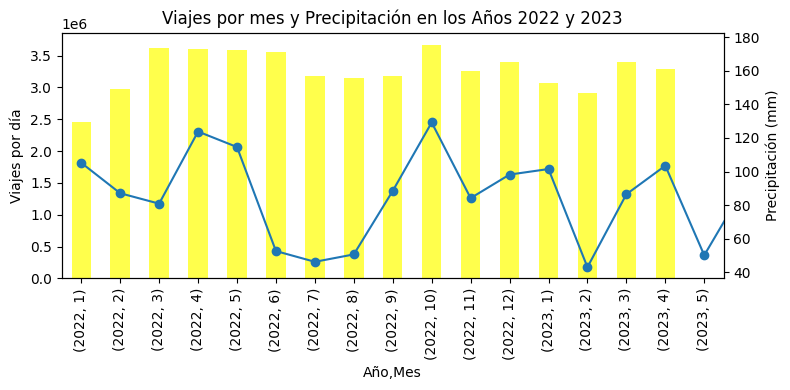

In [369]:
# Filtramos los datos para los años 2022 y 2023
filtered_df_viajes = df_taxis_rutas[df_taxis_rutas['Fecha'].dt.year.isin([2022, 2023]) & (df_taxis_rutas['Tipo de Taxi'] == 'yellow')]
filtered_df_clima = df_NYCclima[df_NYCclima['time'].dt.year.isin([2022, 2023])]

# Agrupamos los datos por año y mes
viajes_por_mes = filtered_df_viajes.groupby([filtered_df_viajes['Fecha'].dt.year.rename('Año'), filtered_df_viajes['Fecha'].dt.month.rename('Mes')])['Viajes por dia'].sum()
precipitacion_por_mes = filtered_df_clima.groupby([filtered_df_clima['time'].dt.year.rename('Año'), filtered_df_clima['time'].dt.month.rename('Mes')])['precipitation (mm)'].sum()

# Creamos el gráfico combinado
fig, ax1 = plt.subplots(figsize=(8, 4))

# Grafico de barras para viajes por día
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Viajes por día')
viajes_por_mes.plot(kind='bar', ax=ax1, color='yellow', alpha=0.7)  # Color amarillo
ax1.tick_params(axis='y')

# Creamos el segundo eje y para la precipitación
ax2 = ax1.twinx()
ax2.set_ylabel('Precipitación (mm)')
precipitacion_por_mes.plot(kind='line', ax=ax2, color='tab:blue', marker='o')
ax2.tick_params(axis='y')

plt.title('Viajes por mes y Precipitación en los Años 2022 y 2023')
fig.tight_layout()
plt.show()




Al examinar la relación entre las precipitaciones y los viajes en taxis amarillos a través del gráfico, se revela un patrón interesante. Durante los períodos de precipitaciones más altas, se observa un pequeño incremento en la cantidad de viajes en taxis amarillos. Esto sugiere que los pasajeros pueden inclinarse hacia los taxis amarillos como una opción de transporte preferida en momentos de condiciones climáticas adversas.

Este fenómeno podría ser el resultado de varios factores interconectados. Por un lado, los taxis amarillos, como una presencia prominente en las calles urbanas, pueden ser percibidos como una opción de transporte conveniente y accesible, especialmente cuando las inclemencias del clima hacen que caminar o esperar en exteriores sea menos atractivo. Además, la visibilidad de los taxis amarillos y su disponibilidad constante pueden influir en la percepción de su accesibilidad en comparación con otras alternativas de transporte.

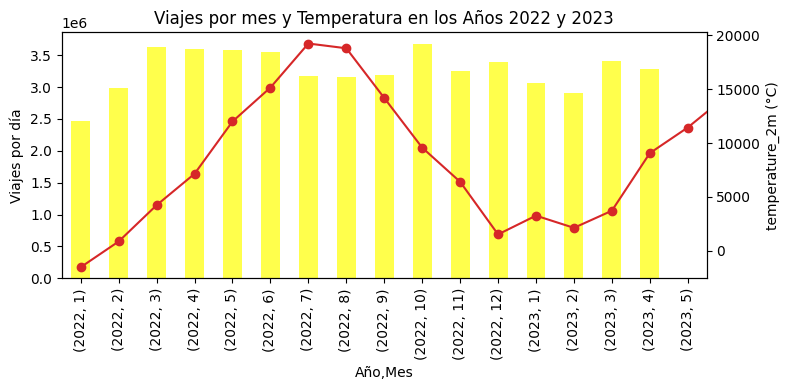

In [20]:
# Convertimos la columna 'time' a tipo datetime
df_NYCclima['time'] = pd.to_datetime(df_NYCclima['time'])

# Filtramos los datos para los años 2022 y 2023
filtered_df_clima = df_NYCclima[df_NYCclima['time'].dt.year.isin([2022, 2023])]

# Filtramos los datos para los años 2022 y 2023
filtered_df_viajes = df_taxis_rutas[df_taxis_rutas['Fecha'].dt.year.isin([2022, 2023]) & (df_taxis_rutas['Tipo de Taxi'] == 'yellow')]
filtered_df_clima = df_NYCclima[df_NYCclima['time'].dt.year.isin([2022, 2023])]

# Agrupamos los datos por año y mes
viajes_por_mes = filtered_df_viajes.groupby([filtered_df_viajes['Fecha'].dt.year.rename('Año'), filtered_df_viajes['Fecha'].dt.month.rename('Mes')])['Viajes por dia'].sum()
precipitacion_por_mes = filtered_df_clima.groupby([filtered_df_clima['time'].dt.year.rename('Año'), filtered_df_clima['time'].dt.month.rename('Mes')])['temperature_2m (°C)'].sum()

# Creamos el gráfico combinado
fig, ax1 = plt.subplots(figsize=(8, 4))

# Grafico de barras para viajes por día
ax1.set_xlabel('Año-Mes')
ax1.set_ylabel('Viajes por día')
viajes_por_mes.plot(kind='bar', ax=ax1, color='yellow', alpha=0.7)  # Color amarillo
ax1.tick_params(axis='y')

# Creamos el segundo eje y para la precipitación
ax2 = ax1.twinx()
ax2.set_ylabel('temperature_2m (°C)')
precipitacion_por_mes.plot(kind='line', ax=ax2, color='tab:red', marker='o')
ax2.tick_params(axis='y')

plt.title('Viajes por mes y Temperatura en los Años 2022 y 2023')
fig.tight_layout()
plt.show()

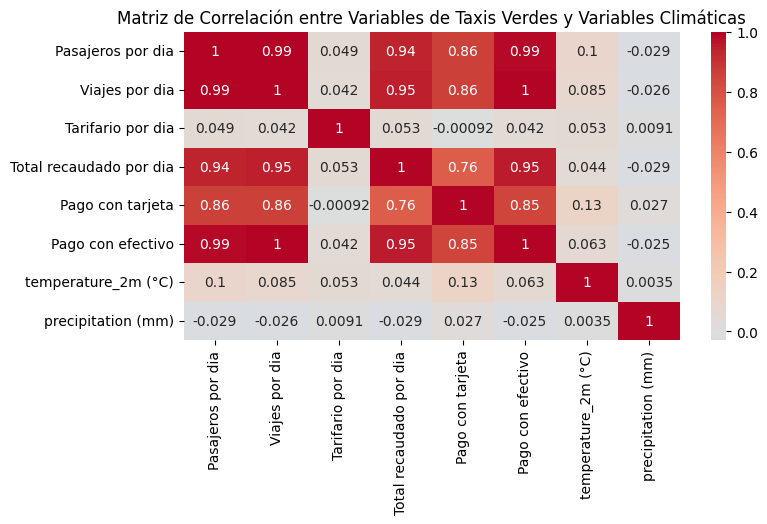

In [364]:
# Convertimos la columna 'Fecha' en formato datetime para ambos data sets
df_taxis_rutas['Fecha'] = pd.to_datetime(df_taxis_rutas['Fecha'])
df_NYCclima['time'] = pd.to_datetime(df_NYCclima['time'])

# Realizamos un filtro para los autos verdes en df_taxis_rutas
df_taxis_verdes = df_taxis_rutas[df_taxis_rutas['Tipo de Taxi'] == 'yellow']

# Realizamos una unión basada en la fecha entre df_taxis_verdes y df_NYCclima
merged_df = pd.merge(df_taxis_verdes, df_NYCclima, left_on='Fecha', right_on='time', how='inner')

# Seleccionar las columnas relevantes para el análisis de correlación
correlation_columns = ['Pasajeros por dia', 'Viajes por dia', 'Tarifario por dia', 'Total recaudado por dia',
                       'Pago con tarjeta', 'Pago con efectivo', 'temperature_2m (°C)', 'precipitation (mm)']

# Calcular la matriz de correlación
correlation_matrix = merged_df[correlation_columns].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables de Taxis Verdes y Variables Climáticas')
plt.show()

Acá se puede vizualizar que la temperatura podría tener una influencia más fuerte en la cantidad de viajes de taxis amarillos en comparación que con las precipitaciones.

En el siguiente grafico podemos vizualizar en porcentajes la cantidad de viajes en los últimos meses registrado para el año 2023. 

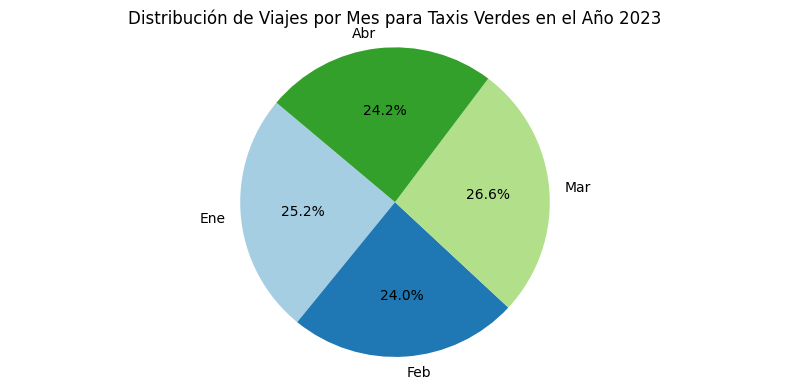

In [28]:
# Convertir la columna "Fecha" a tipo datetime
df_taxis_rutas["Fecha"] = pd.to_datetime(df_taxis_rutas["Fecha"])

# Filtrar los datos para el año 2023 y taxis verdes
filtered_df = df_taxis_rutas[(df_taxis_rutas['Fecha'].dt.year == 2023) & (df_taxis_rutas['Tipo de Taxi'] == 'green')]

# Agrupar los datos por mes y sumar la cantidad de viajes
viajes_por_mes = filtered_df.groupby(filtered_df['Fecha'].dt.month)['Viajes por dia'].sum()

# Nombres de los meses
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr']

# Crear el gráfico circular con colores diferentes para cada mes
plt.figure(figsize=(8, 4))
plt.pie(viajes_por_mes, labels=nombres_meses, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribución de Viajes por Mes para Taxis Verdes en el Año 2023')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.tight_layout()
plt.show()